# Missing Completely at Random (MCAR)

MCAR means there is no relationship between the missingness of the data and any values, observed or missing. This kind of missing values is the easiest to understand. The fact that the data is missing has nothing to do neither with observed data nor with non-observed data, it’s just missing. There is no logic in it.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing not at Random (MNAR)

When data are MNAR, the fact that the data are missing is systematically related to the unobserved data, that is, the missingness is related to events or factors which are not measured by the researcher.The missingness is specifically related to what is missing, e.g. a person does not attend a drug test because the person took drugs the night before, a person did not take English proficiency test due to his poor English language skill. The cases of MNAR data are problematic. The only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data but that requires proper understanding and domain knowledge of the missing variable. 

In [7]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [8]:
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing at Random (MAR)
MAR data — means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. What it means, is that the missingness of data can be predicted by other features in the dataset.

# Techniques of handling missing values

1. <b>Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### 1. Mean, Median, Mode Imputation
<b> Defination:</b> Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean or median.

<b>Which variables can I impute with Mean / Median Imputation?</b> The mean and median can only be calculated on numerical variables, therefore, these methods are suitable for continuous and discrete numerical variables only.

<b>Assumptions:</b>
1. Data is missing completely at random (MCAR)
2. The missing observations, most likely look like the majority of the observations in the variable (aka, the mean/median)
3. If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent/average observation.

In [10]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
median = df.Age.median()
median

28.0

In [14]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [15]:
impute_nan(df, 'Age', median)

In [16]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
# checking standard deviatrion of Age vs Age_median
print('Standard Deviation of Age: ', df['Age'].std())
print('Standard Deviation of Age_median: ', df['Age_median'].std())

Standard Deviation of Age:  14.526497332334044
Standard Deviation of Age_median:  13.019696550973194


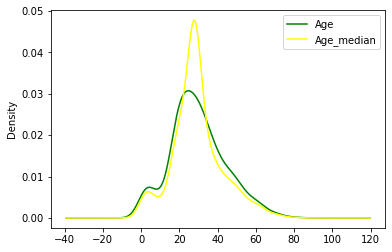

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind = 'kde', ax=ax, color = 'green')
df.Age_median.plot(kind = 'kde', ax = ax, color = 'yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

#### Advantages:
* Easy to implement.
* Fast way of obtaining complete datasets.
* Can be integrated into production (during model deployment).

#### Disadvantages:
* Distortion of the original variable distribution.
* Distortion of the original variance.

### 2. Random Sample Imputation
<b>Defination: </b>Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

<b>When should it be used?</b> It assumes that the data are missing completely at random(MCAR)

In [22]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [26]:
df['Age'].dropna().sample(df.Age.isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [27]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [29]:
median = df.Age.median()

In [33]:
median

28.0

In [30]:
impute_nan(df, 'Age', median)

In [31]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


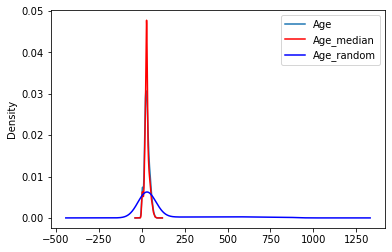

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_median.plot(kind = 'kde', ax = ax, color = 'red')
df.Age_random.plot(kind = 'kde', ax = ax,color = 'blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

#### Advantages
* Easy To implement
* There is less distortion in variance

#### Disadvantage
* Every situation randomness wont work

### 3. Capturing NAN values with a new feature
<b>Defination: </b>This technique suits well, when the data is not missing at random (MNAR). We will be capturing Nan values and further it will be replaced with our new features which we will compute on desired column or values.

In [34]:
df = pd.read_csv('titanic.csv', usecols = ['Survived', 'Age', 'Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
df.Age.median()

28.0

In [38]:
df['Age_NAN'] = np.where(df.Age.isnull(), 1, 0)

In [39]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [43]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### Advantages
* Easy to implement
* Able to capture the importance of missing values
 
#### Disadvantage
* Creates additional features causing Curse of Dimensionality (CoD). This might happen in the case where you have huge amount of data. This means that this technique will work perfectly where you have sparse data.

### End of Distribution imputation
<b>Defination: </b>* End of tail imputation is equivalent to arbitrary value imputation, but automatically selecting arbitrary values at the end of the variable distributions.
* If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation.
* If the variable is skewed, we can use the IQR proximity rule.

<b>How to do it</b>
* if the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation.

<b>Assumptions:</b>
* MNAR — values are not missing at random.
* If the value is not missing at random, we don’t want to replace it for the mean/median and therefore make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

In [45]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:>

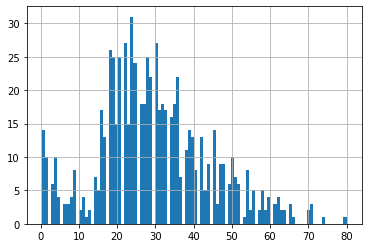

In [48]:
df.Age.hist(bins = 100)

In [49]:
end = df.Age.mean() + 3*df.Age.std()

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

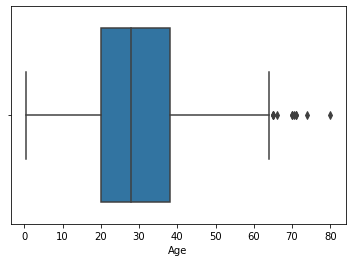

In [52]:
sns.boxplot('Age', data = df)

In [53]:
def impute_nan(df, variable, median, end):
    df[variable+"_end_of_dist"] = df[variable].fillna(end)
    df[variable].fillna(median, inplace = True)

In [54]:
median = df.Age.median()

In [55]:
impute_nan(df, 'Age', median, end)

In [56]:
df.head()

,Survived,Age,Fare,Age_end_of_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

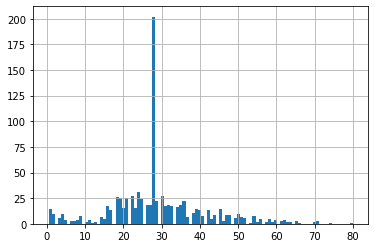

In [57]:
df['Age'].hist(bins = 100)

<AxesSubplot:>

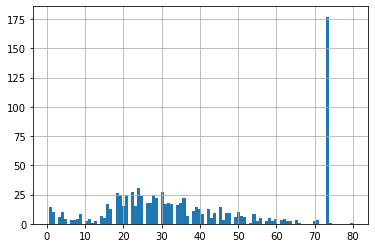

In [58]:
df['Age_end_of_dist'].hist(bins = 100)

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_of_dist'>

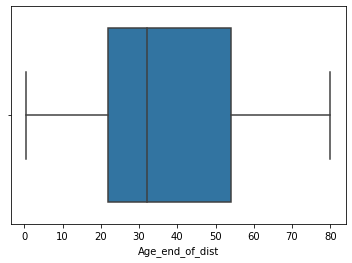

In [59]:
sns.boxplot('Age_end_of_dist', data = df)

#### Advantages:
* Easy to implement
* Fast way of obtaining complete datasets
* Can be integrated into production (during model deployment)
* Captures the importance of “missingness” if there is one

#### Disadvantages:
* Distortion of the original variable distribution
* Distortion of the original variance
* Distortion of the covariance with the remaining variables of the dataset
* This technique may mask true outliers in the distribution

### Arbitrary imputation
<b>Defination: </b>Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value.
Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

<b>Assumptions:</b>
* Data is not missing at random.
* If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.

In [60]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [62]:
def impute_nan(df, variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_fifty"] = df[variable].fillna(50)

In [63]:
impute_nan(df, 'Age')

In [66]:
df

,Survived,Age,Fare,Age_zero,Age_fifty
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,50.0
889,1,26.0,30.0000,26.0,26.0


#### Advantages:
* Easy to implement
* Fast way of obtaining complete datasets
* Can be integrated into production (during model deployment)
* Captures the importance of “missingness” if there is one

#### Disadvantages:
* Distortion of the original variable distribution